In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g5fjqe2hBz87pNhvOIYUvS2PJBx8lNQY-buN7RwSf7o4TsuFOicmbQ
Mounted at /content/drive


In [3]:
!pip install pytorch-msssim

In [4]:
import glob
import random
import os
import numpy as np
import argparse
import math
import itertools
import sys

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms

import torchvision.transforms as transforms
from torchvision.utils import save_image, make_grid

from torch.utils.data import DataLoader
from torch.autograd import Variable

from matplotlib import pyplot as plt

from pytorch_msssim import ssim, ms_ssim, SSIM, MS_SSIM

# Normalization parameters for pre-trained PyTorch models
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

In [22]:
from drive.MyDrive.ImageSuperResolution import final

In [15]:
class ImageDataset(Dataset):
    def __init__(self, root, shape, transform):
        height, width = shape
        # Transforms for low resolution images and high resolution images
        self.transform = transform

        self.files = sorted(glob.glob(root + "/*.*"))

    def __getitem__(self, index):
        low_path = self.files[index % len(self.files)]
        #high_path = low_path.replace('low','high')
        
        img_low = Image.open(low_path)
        #img_high = Image.open(high_path)
        
        img_low = self.transform(img_low)
        #img_high = self.transform(img_high)
         
        name = low_path[75:]

        return {"low": img_low, "name": name}


    def __len__(self):
        return len(self.files)

In [16]:
root = '/content/drive/MyDrive/ImageSuperResolution/DatasetBatches/SRGAN_generated/'
shape = (400,400)

transform = transforms.Compose(
            [
                #transforms.Resize((shape[0], shape[1]), Image.BICUBIC),
                transforms.ToTensor(),
                #transforms.Normalize(mean, std),
            ]
        )

In [23]:
data = ImageDataset(root, shape, transform)

In [24]:
data[0]['low'].shape

torch.Size([3, 400, 400])

In [25]:
data[0]['name']

'image0000.jpg'

In [26]:
n = 200
batch_size = 1
channels = 3

CONV_BLOCKS = 5

In [27]:
final = final.out(channels, CONV_BLOCKS)

In [28]:
cuda = torch.cuda.is_available()

In [29]:
if cuda:
    final = final.cuda()

In [30]:
final.load_state_dict(torch.load("drive/MyDrive/ImageSuperResolution/final/saved_models/out_"+str(n-1)+".pth"))

<All keys matched successfully>

In [31]:
dataloader = DataLoader(
    data,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
)

In [32]:
Tensor = torch.cuda.FloatTensor if cuda else torch.Tensor

In [33]:
os.makedirs("drive/MyDrive/ImageSuperResolution/DatasetBatches/final_generated", exist_ok=True)

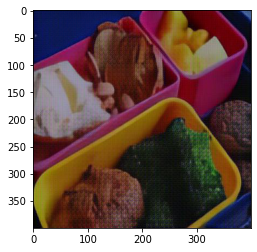

In [34]:
k = data[0]['low']
plt.imshow(data[0]['low'].permute(1,2,0))

In [35]:
k = k[np.newaxis, ...]


In [36]:
Variable(k.type(Tensor)).shape

torch.Size([1, 3, 400, 400])

In [37]:
final(Variable(k.type(Tensor)))

tensor([[[[0.0646, 0.0445, 0.0263,  ..., 0.4054, 0.3963, 0.3887],
          [0.0767, 0.0331, 0.0590,  ..., 0.3958, 0.3856, 0.3773],
          [0.0718, 0.0286, 0.0438,  ..., 0.4258, 0.4050, 0.3948],
          ...,
          [0.0853, 0.0477, 0.0312,  ..., 0.1456, 0.1558, 0.1599],
          [0.0151, 0.0473, 0.0500,  ..., 0.1361, 0.1499, 0.1616],
          [0.0967, 0.0602, 0.0530,  ..., 0.1377, 0.1363, 0.1582]],

         [[0.1202, 0.1152, 0.1259,  ..., 0.5123, 0.4799, 0.4907],
          [0.1409, 0.1307, 0.1380,  ..., 0.5297, 0.5166, 0.4843],
          [0.1354, 0.1307, 0.1379,  ..., 0.5447, 0.5275, 0.5060],
          ...,
          [0.0598, 0.0445, 0.0439,  ..., 0.1910, 0.1867, 0.1904],
          [0.0432, 0.0248, 0.0490,  ..., 0.1748, 0.1631, 0.1807],
          [0.1675, 0.1037, 0.0758,  ..., 0.1601, 0.1589, 0.1653]],

         [[0.3637, 0.3413, 0.3767,  ..., 0.6301, 0.5805, 0.5458],
          [0.3515, 0.3404, 0.3902,  ..., 0.6469, 0.6421, 0.5749],
          [0.4224, 0.3999, 0.4189,  ..., 0

In [ ]:
generated_image_root = 'drive/MyDrive/ImageSuperResolution/DatasetBatches/final_generated/'
for i, imgs in enumerate(dataloader):
        img_low = Variable(imgs["low"].type(Tensor))
        outputs = final(img_low)
        outputs.detach_
        outputs = outputs.to('cpu')
        for i, img in enumerate(outputs):
            save_image(img, generated_image_root + imgs['name'][i])